## Morning practical 1 day 2

Hi there. Here, you're going to implement the sigmoid function and the cost function for logistic regression, before running the algorithm on a test dataset

In [1]:
#run this cell to set things up
import ipywidgets as widgets, numpy as np, pandas as pd
from numpy.random import default_rng
%matplotlib inline
import matplotlib.pyplot as plt
import math
import seaborn as sns
from IPython.display import display, Markdown

## Making and plotting the sigmoid function

As a first exercise, do the following:
* implement the sigmoid function. Note that $e^x$ is `np.exp(x)` in Numpy.
* get 100 numbers from a normal distribution `rng = default_rng() ; vals = rng.standard_normal(100)`
* apply your sigmoid function to these 100 values
* plot the sigmoid outputs on the y axis and the original values on the x-axis

Plotting hints:
* start a new plot with `fig, ax = plt.subplots()`
* you can plot points with `ax.scatter(xData, yData, colour= "red", label = "WowCoolMan")`
* you can label the x- and y-axis with `ax.set_xlabel("Banana"); ax.set_ylabel("Happiness level")`
* add a legend with `ax.legend()` (wait for it ....ary)
* once you are done plotting, you need to run `fig.show()`

[1.92874985e-22 2.68941421e-01 5.00000000e-01 7.31058579e-01
 1.00000000e+00]


/var/folders/_h/r7771tk92552ms71w8h1mdwm0000gq/T/ipykernel_95710/1954968763.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


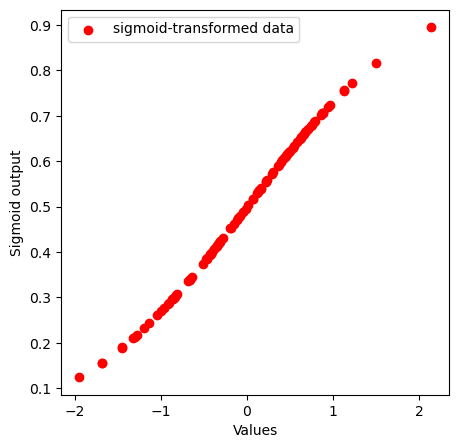

In [2]:
testArray = np.array([-50, -1, 0, 1, 50])

#answer
def mySigmoid(data):
    output = 1/(1+ np.exp(-data))
    return output

print(mySigmoid(testArray))

rng           = default_rng(seed = 42)
vals          = rng.standard_normal(100)
sigmoidValues = mySigmoid(vals)

fig, ax = plt.subplots(dpi=100, figsize=(5, 5))
ax.scatter(vals, sigmoidValues, color = "red", label = "sigmoid-transformed data")
ax.set_xlabel("Values")
ax.set_ylabel("Sigmoid output")
ax.legend()
fig.show()

## Assigning a class

Let's have these random numbers stand in for real output from logistic regression. Say we want to classify samples as 1 if they have >= 70% chance of being positive, whereas we want to classify all other samples as negative. Up to you to make it happen!

* Get an array of predicted class membership based on your Sigmoid function output. Call it `predictedClass`. For example, you could make a vector of zeros with `np.zeros`, and then set the elements that are >= 0.7 in your sigmoid output to 1. Or you could use `np.where` with x and y arguments (see [here](https://numpy.org/doc/stable/reference/generated/numpy.where.html)). 
* Change your plotting code to:
    * colour the points by their assigned class (use two `ax.scatter` calls with different labels)
    * add a vertical dashed line where we've placed our threshold (you'll probably need [this](https://stackoverflow.com/a/68087129), and `ax.vlines` [(click)](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.vlines.html))

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


/var/folders/_h/r7771tk92552ms71w8h1mdwm0000gq/T/ipykernel_95710/2227222695.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


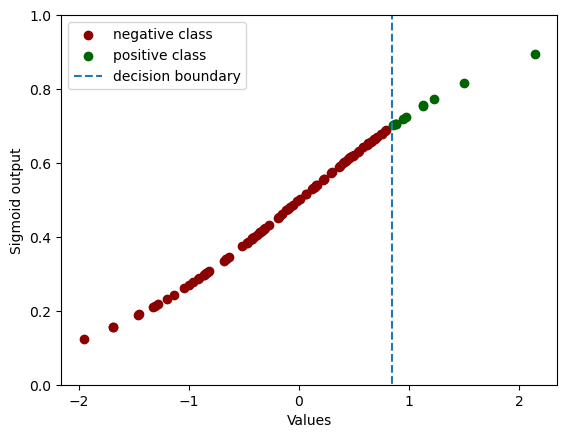

In [3]:
#answer 
predictedClass = np.zeros_like(sigmoidValues)
predictedClass[sigmoidValues >= 0.7] = 1.
print(predictedClass)

#plotting

thresholdXLocation = np.log(0.7/(1-0.7))

fig, ax = plt.subplots()
ax.scatter(vals[np.where(predictedClass == 0)], sigmoidValues[np.where(predictedClass == 0)],
           color = "darkred", label = "negative class")
ax.scatter(vals[np.where(predictedClass == 1)], sigmoidValues[np.where(predictedClass == 1)],
           color = "darkgreen", label = "positive class")
ax.set_xlabel("Values")
ax.set_ylabel("Sigmoid output")
ax.set_ylim([0, 1])
ax.vlines(thresholdXLocation, -0.2, 1.2, linestyle = "dashed", label = "decision boundary")
ax.legend()
fig.show()


## Running logistic regression

To run logistic regression, we'll need to do a few things:
* Make a function called `linAlgLogRegHypothesis(x, thetas)` that internally runs `linAlgRegHypothesis` and then uses the sigmoid function on those outputs and returns this.
* Define a new cost function `costFuncLogReg(x, y, thetas)`.
* Change gradient descent to allow it to select the hypothesis function it uses.

First make `linAlgLogRegHypothesis`. Remember, this is just a function that calls `mySigmoid(linAlgRegHypothesis(data, thetas))` and returns the result. <br> <br> 

**Hint:**
* The output of your `linAlgLogRegHypothesis` using `testX` as data and `testThetas` as parameters should be: <br>
`[[0.71300016]
 [0.95302385]]`



In [4]:
testX = np.array([[0.2, -0.03], [-0.3, 0.52]])
testY = np.array([[0], [1]])
testThetas = np.array([[0.8], [1.3], [5]])

# note that this function autmoatically appends the column of ones, so you don't need to do that yourself!
def linAlgRegHypothesis(data, thetas):
    data = np.array(data)
    oneFeatToAdd = np.ones(len(data))
    newFeatArray = np.c_[oneFeatToAdd, data]
    #make sure thetas are always of the form np.array([[theta1], [theta2]]), i.e. column vector
    if thetas.ndim < 2:
        thetas = thetas[:, np.newaxis]
    predictions = newFeatArray @ thetas
    return predictions

#answer 

def linAlgLogRegHypothesis(data, thetas):
    output = mySigmoid(linAlgRegHypothesis(data, thetas))
    return output

print(linAlgLogRegHypothesis(testX, testThetas))


[[0.71300016]
 [0.95302385]]


## Making the cost function

Now, make a new cost function `costFuncLogReg(x, y, thetas)`. It should implement the formula: <br> <br>$$Cost(x) = -y \cdot log(h_\theta(x))- (1-y) \cdot log(1-h_\theta(x))$$ <br> with $$h_\theta(x) = sigmoid(\theta^T \cdot x)$$
<br>
Note that it should work with arrays, i.e. y is a column vector of 0 or 1, which looks like this: $y = \begin{bmatrix} 1 \\ 0 \\ \vdots \\ 0 \\ 0 \end{bmatrix}$, and x is an array with samples on the rows and their features in the columns (such as $ X = \begin{bmatrix} 0.18 & 1.03 \\ \vdots & \vdots \\ -0.72 & 0.4 \end{bmatrix}$. <br> Use `np.nansum` rather than `np.sum`: this ignores NaNs if for some reason they are present in the data, rather than throwing an error. 

**Hint:**
* The output of `costFuncLogReg(testX, testY, testThetas)` should be ~`0.64819`

In [5]:
def costFuncLogReg(x, y, thetas):
    predictions      = linAlgLogRegHypothesis(x, thetas)
    costsPerSample   = -y * np.log(predictions) - (1-y) * np.log(1 - predictions)
    totalCosts       = np.nansum(1/len(x) * costsPerSample)
    return totalCosts

print(costFuncLogReg(testX, testY, testThetas))

0.6481944875885969


## Using gradient descent for your logistic regression

Nearly there, we just need to change the gradient descent function from yesterday to use logistic regression for prediction rather than linear regression. We'll do that by adding an argument `cost_fun` which can be either `'linear'` or `'logistic'`. <br> A copy of the gradient descent function from yesterday is provided below. Your job is to add an extra argument.

* Your function definition should look like `def linAlgGradientDescent(x, y, thetas, alpha, cost_fun = "linear"):`
* Make sure to define the appropriate checks with if-statements.



**Optional:** here's a link to a derivation showing that the gradient of the logistic regression cost function is the same as that of linear regression, and that it is convex: [LogRegGradientDerivation](WhyLogRegGradEqual.png)

In [6]:
def linAlgGradientDescent(x, y, thetas, alpha) :
    m = len(x)
    if thetas.ndim < 2:
        thetas = thetas[:, np.newaxis]
    preds  = linAlgRegHypothesis(x, thetas)
    if preds.shape != (m, 1):
        preds  = preds[:, np.newaxis]
    if y.ndim < 2:
        y = y[:, np.newaxis]
    errors = preds - y
    gradientSummation  = errors.T @ np.c_[np.ones(len(errors)), x]
    finalGradientSteps = alpha/m * gradientSummation
    newThetas          = thetas - finalGradientSteps.T
    return newThetas

#answer

def linAlgGradientDescent(x, y, thetas, alpha, cost_fun = "linear") :
    possible_methods = ["linear", "logistic"]
    if cost_fun not in possible_methods:
        print("Error! Wrong method given. Should be one of: " + str(possible_methods) + "\n Returning None!")
        return
    m = len(x)
    ## all these shape/ndim calls are unnecessary if you input column vectors as you should.
    if thetas.ndim < 2:
        thetas = thetas[:, np.newaxis]
    if cost_fun == "linear":
        preds  = linAlgRegHypothesis(x, thetas)
    else:
        preds = linAlgLogRegHypothesis(x, thetas)

    if preds.shape != (m, 1):
        preds  = preds[:, np.newaxis]
    if y.shape != (m, 1):
        y = y[:, np.newaxis]
    errors = preds - y
    gradientSummation  = errors.T @ np.c_[np.ones(len(errors)), x]
    finalGradientSteps = alpha/m * gradientSummation
    newThetas          = thetas - finalGradientSteps.T
    return newThetas

## Testing your gradient descent function

The below puts your function to the test. We assume that the predictedClass you made earlier (where you used 100 random normally distributed values, put them into the sigmoid, and assigned the 20% highest values as 1 and the rest as 0) are the true labels. We start from random thetas, update them by gradient descent, and look whether the predicted class indeed moves towards the actual signal (decision threshold) that is present in the data.

After looking at the images, answer the following question: 
* Why is there still a cost when all predictions are correct? How is that possible? **--> There is still a cost because the theta parameters are not outputting exactly 1 for each positive sample, nor exactly 0 for every negative sample. However, given your decision threshold of >=0.7 --> 1 and <0.7 --> 0, they do give the correct final labels.** 


/var/folders/_h/r7771tk92552ms71w8h1mdwm0000gq/T/ipykernel_95710/3619286945.py:62: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


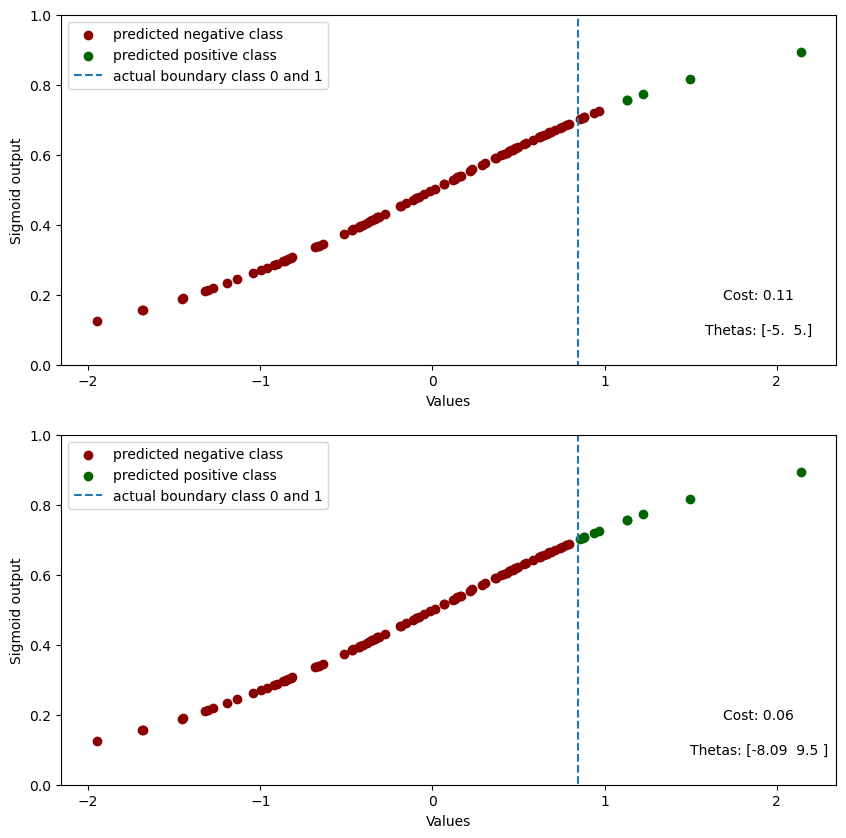

In [7]:
labels = predictedClass[:, np.newaxis]
values = vals[:, np.newaxis]
thetas = np.array([[-5.0], [5.0]])
alpha = 0.8
stepsToTake = 1000
thresholdXLocation = np.log(0.7/(1-0.7))

# running gradient descent
thetasAlongDescent = []
thetasAlongDescent.append(thetas)
costAlongDescent   = []
for gradientDescentStep in range(0, stepsToTake):
    costNow   = costFuncLogReg(values, labels, thetasAlongDescent[-1])
    costAlongDescent.append(costNow)
    newThetas = linAlgGradientDescent(values, labels, thetasAlongDescent[-1], alpha, cost_fun = "logistic")
    thetasAlongDescent.append(newThetas)
    
#Plot the predictions for the untrained model and the trained model using a threshold of 0.5 (50%)

fig, ax = plt.subplots(2, 1, figsize = (10,10))

initialPredictions = linAlgLogRegHypothesis(values, thetas)
initialClassPred   = np.where(initialPredictions<=0.5,0,1)
finalPredictions   = linAlgLogRegHypothesis(values, thetasAlongDescent[-1])
finalClassPred     = np.where(finalPredictions<=0.5,0,1)
sigmoidValues      = mySigmoid(values)

ax[0].scatter(vals[np.where(np.ravel(initialClassPred) == 0)],
              sigmoidValues[np.where(np.ravel(initialClassPred) == 0)],
              color = "darkred", label = "predicted negative class")
ax[0].scatter(vals[np.where(np.ravel(initialClassPred) == 1)],
              sigmoidValues[np.where(np.ravel(initialClassPred) == 1)],
              color = "darkgreen", label = "predicted positive class")
ax[0].set_xlabel("Values")
ax[0].set_ylabel("Sigmoid output")
ax[0].vlines(thresholdXLocation, -0.2, 1.2, linestyle = "dashed", label = "actual boundary class 0 and 1")
ax[0].set_ylim([0, 1])
ax[0].legend()

ax[0].text(0.9, 0.2, 'Cost: ' + str(np.round(np.sum(costAlongDescent[0]), 2)), horizontalalignment='center', 
                                    verticalalignment='center', transform=ax[0].transAxes)
ax[0].text(0.9, 0.1, 'Thetas: ' + str(np.ravel(thetas)), horizontalalignment='center', 
                                    verticalalignment='center', transform=ax[0].transAxes)

ax[1].scatter(vals[np.where(np.ravel(finalClassPred) == 0)],
              sigmoidValues[np.where(np.ravel(finalClassPred) == 0)],
              color = "darkred", label = "predicted negative class")
ax[1].scatter(vals[np.where(np.ravel(finalClassPred) == 1)],
              sigmoidValues[np.where(np.ravel(finalClassPred) == 1)],
              color = "darkgreen", label = "predicted positive class")
ax[1].set_xlabel("Values")
ax[1].set_ylabel("Sigmoid output")
ax[1].vlines(thresholdXLocation, -0.2, 1.2, linestyle = "dashed", label = "actual boundary class 0 and 1")
ax[1].set_ylim([0, 1])
ax[1].legend()

ax[1].text(0.9, 0.2, 'Cost: ' + str(np.round(np.sum(costAlongDescent[-1]), 2)), horizontalalignment='center',
    verticalalignment='center', transform=ax[1].transAxes)
ax[1].text(0.9, 0.1, 'Thetas: ' + str(np.ravel(np.round(thetasAlongDescent[-1], 2))), horizontalalignment='center', 
                                    verticalalignment='center', transform=ax[1].transAxes)

fig.show()


## Plotting parameter changes along gradient descent
Let's plot how the parameters of our linear regression change along gradient descent:

Initial cost: 0.10763226823216046
Final cost: 0.06374627772842775


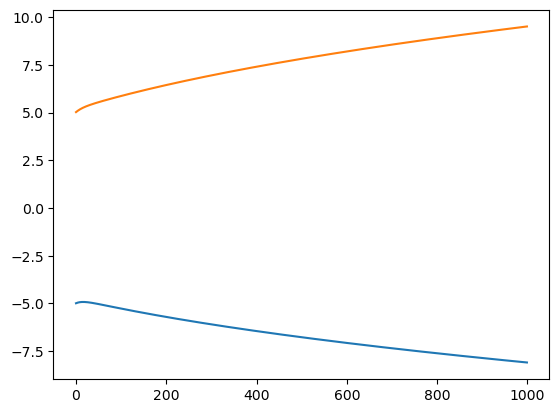

In [8]:
thetaTimeCourse = np.hstack(thetasAlongDescent)

figTheta, axTheta = plt.subplots()
axTheta.plot(range(0, stepsToTake), thetaTimeCourse[0,1:], label = "Theta0")
axTheta.plot(range(0, stepsToTake), thetaTimeCourse[1,1:], label = "Theta1")

print("Initial cost: " + str(costAlongDescent[0]))
print("Final cost: " + str(costAlongDescent[-1]))

## Best decision boundary

You can see that, in principle, the optimal situation (when we don't consider generalisation) is to simply parameterise the sigmoid function such that it becomes a so-called step function: <div>
<img src="Dirac_distribution_CDF.svg" width="500"/>
</div>
at exactly the point where the class shifts from 0 to 1. You see that all the predictions before this threshold are (up to some numerical precision) 0, and all the ones after it are 1. To get this step function you need rather extreme values for $\theta_0$ and $\theta_1$. With gradient descent it would take ages to find these exact extreme values, as the gradients get very low in the extremes of the sigmoid function. With better optimizers like BFGS, it can be rather quick. Modern libraries use all sorts of tricks to improve numerical stability and get more well-behaved gradients. 

## Working with more features

Until now we've worked with just one feature, which is somewhat unfulfilling. Let's change to two features and see what happens then.

Text(0, 0.5, 'Feature 2')

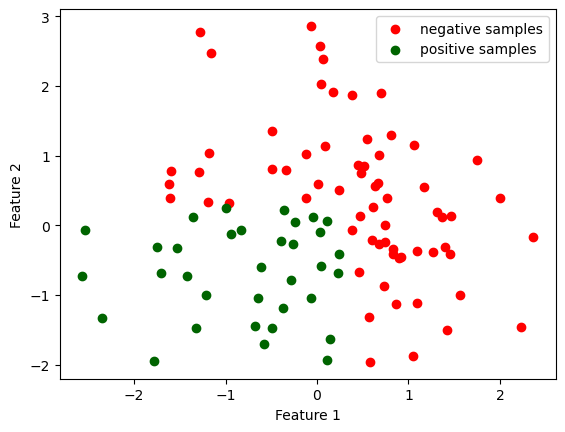

In [9]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
rng = np.random.default_rng()
randomFeat1, randomFeat2 = rng.standard_normal(100), rng.standard_normal(100)
labels = np.logical_and(randomFeat1 <= 0.25, randomFeat2 <= 0.25).astype(int)

plt.scatter(randomFeat1[labels == 0], randomFeat2[labels == 0], color = "red", label = "negative samples")
plt.scatter(randomFeat1[labels == 1], randomFeat2[labels == 1], color = "darkgreen",
            label = "positive samples")
plt.legend()
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")


## Calculating the decision boundary
We want to perform logistic regression for classification here. Below, I have provided code that uses scikit-learn's implementation of logistic regression. Full disclosure: I resorted to this due to numerical instability in other optimization algorithms. Anyway, we'll optimize logistic regression in a similar way that we implemented it, and then see what the final decision boundary is that is learned. You only need to get and plot the decision boundaries.

Up to you to:
* Plot the decision boundaries before and after optimisation (helpful code provided).

Loss Comparison:
Initial parameters loss: 0.8038
Sklearn model loss: 0.2871
Improvement: 0.5168 (64.3%)

Parameter Comparison:
-----------------------------------------------------------------
Parameter    | Initial Value   | Optimized Value     
-----------------------------------------------------------------
Bias         | 0.200000        | -1.308155           
Weight1      | 0.300000        | -2.227171           
Weight2      | -0.100000       | -2.163277           
-----------------------------------------------------------------
Loss         | 0.803839        | 0.287056            
Accuracy     | 34.0           % | 83.0                %
-----------------------------------------------------------------


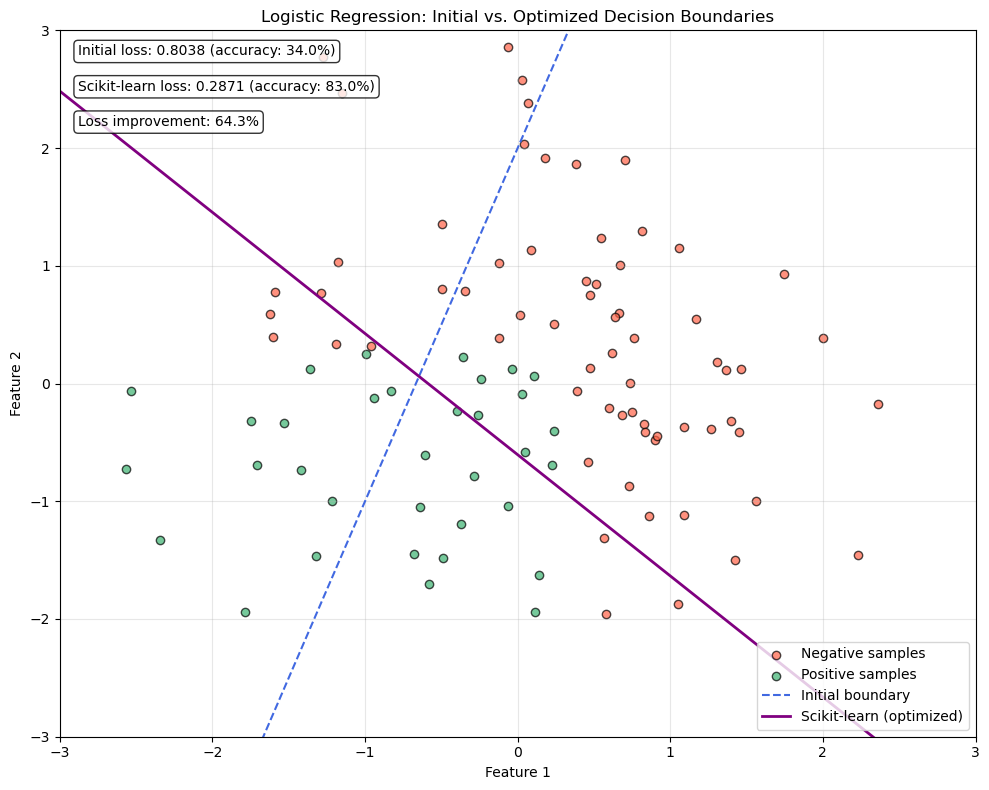

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# Prepare features
features = np.hstack([randomFeat1[:, np.newaxis], randomFeat2[:, np.newaxis]])
twoDLabels = labels[:, np.newaxis]

# Define initial thetas for initial decision boundary
initialThetas = np.array([0.2, 0.3, -0.1])

###############
#Ignore all this. Just optimizing logistic regression in scikit-learn and making a plot
###############

# Logistic regression hypothesis function (for making predictions)
def linAlgLogRegHypothesis(x, thetas):
    z = np.c_[np.ones(len(x)), x] @ thetas
    return 1 / (1 + np.exp(-z))

# Train scikit-learn model with no regularization
skl_model = LogisticRegression(penalty=None, fit_intercept=True, solver='lbfgs', max_iter=1000)
skl_model.fit(features, labels)

# Get scikit-learn parameters
skl_intercept = skl_model.intercept_[0]
skl_coef = skl_model.coef_[0]
skl_thetas = np.array([skl_intercept, skl_coef[0], skl_coef[1]])

# Get predictions from both models
initial_probs = linAlgLogRegHypothesis(features, initialThetas)
skl_probs = skl_model.predict_proba(features)[:, 1]

# Calculate losses using scikit-learn's log_loss function
initial_loss = log_loss(labels, initial_probs)
skl_loss = log_loss(labels, skl_probs)

print("Loss Comparison:")
print(f"Initial parameters loss: {initial_loss:.4f}")
print(f"Sklearn model loss: {skl_loss:.4f}")
print(f"Improvement: {initial_loss - skl_loss:.4f} ({(1 - skl_loss/initial_loss)*100:.1f}%)")

# Calculate accuracy
initial_preds = (initial_probs >= 0.5).astype(int)
skl_preds = (skl_probs >= 0.5).astype(int)
initial_accuracy = np.mean(initial_preds == labels) * 100
skl_accuracy = np.mean(skl_preds == labels) * 100


# Print the parameters comparison
print("\nParameter Comparison:")
print("-" * 65)
print(f"{'Parameter':<12} | {'Initial Value':<15} | {'Optimized Value':<20}")
print("-" * 65)
print(f"{'Bias':<12} | {initialThetas[0]:<15.6f} | {skl_thetas[0]:<20.6f}")
print(f"{'Weight1':<12} | {initialThetas[1]:<15.6f} | {skl_thetas[1]:<20.6f}")
print(f"{'Weight2':<12} | {initialThetas[2]:<15.6f} | {skl_thetas[2]:<20.6f}")
print("-" * 65)
print(f"{'Loss':<12} | {initial_loss:<15.6f} | {skl_loss:<20.6f}")
print(f"{'Accuracy':<12} | {initial_accuracy:<15.1f}% | {skl_accuracy:<20.1f}%")
print("-" * 65)

# Create a grid for plotting
x_range = np.linspace(-3, 3, 100)

# Plot data and decision boundaries
plt.figure(figsize=(10, 8))

# Plot data points
plt.scatter(randomFeat1[labels == 0], randomFeat2[labels == 0], 
            color="tomato", label="Negative samples", alpha=0.7, edgecolor='k')
plt.scatter(randomFeat1[labels == 1], randomFeat2[labels == 1], 
            color="mediumseagreen", label="Positive samples", alpha=0.7, edgecolor='k')

# Add text information
plt.text(0.02, 0.98, f'Initial loss: {initial_loss:.4f} (accuracy: {initial_accuracy:.1f}%)', 
         transform=plt.gca().transAxes, verticalalignment='top', 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
plt.text(0.02, 0.93, f'Scikit-learn loss: {skl_loss:.4f} (accuracy: {skl_accuracy:.1f}%)', 
         transform=plt.gca().transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
plt.text(0.02, 0.88, f'Loss improvement: {(1 - skl_loss/initial_loss)*100:.1f}%', 
         transform=plt.gca().transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Enhance the plot appearance
plt.grid(True, alpha=0.3)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Logistic Regression: Initial vs. Optimized Decision Boundaries")
plt.ylim(-3, 3)
plt.xlim(-3, 3)
plt.tight_layout()


###############
#You may stop ignoring now
###############

def getDecisionBoundaryYValues(feat1, thetas):
    """
    Compute the y-values of the decision boundary line for logistic regression.

    This function calculates the y-values of the decision boundary for a given 
    set of x-values (`feat1`) in a logistic regression model with two features. 
    The decision boundary is derived from the equation of a logistic regression model:

        z = b + w1*x1 + w2*x2

    The decision boundary is defined where the model outputs a probability of 0.5, 
    which corresponds to z = 0:

        0 = b + w1*x1 + w2*x2

    Solving for x2 (y-values):

        x2 = (-w1 / w2) * x1 - (b / w2)

    Parameters:
    -----------
    feat1 : array-like
        The x-values (feature 1) used to compute corresponding decision boundary y-values.
    thetas : tuple or list of floats
        The model parameters (b, w1, w2), where:
        - b  : Intercept term (bias)
        - w1 : Weight for feature 1 (x-axis)
        - w2 : Weight for feature 2 (y-axis)

    Returns:
    --------
    array-like
        The computed y-values for the decision boundary.

    Notes:
    ------
    - A small epsilon (1e-10) is added to `w2` if it's very close to zero to prevent division errors.
    - This function assumes a linear decision boundary, applicable to logistic regression with two features.
    """
    b, w1, w2 = thetas
    # Avoid division by zero
    if abs(w2) < 1e-10:
        w2 = 1e-10
    return (-w1 / w2) * feat1 - (b / w2)


#Hint: use x_range
#YOUR ANSWER HERE#



#Answer:

# Compute decision boundaries
initialBoundary = getDecisionBoundaryYValues(x_range, initialThetas)
skl_boundary = getDecisionBoundaryYValues(x_range, skl_thetas)

# Plot decision boundaries
plt.plot(x_range, initialBoundary, color="royalblue", label="Initial boundary", linestyle='--')
plt.plot(x_range, skl_boundary, color="purple", label="Scikit-learn (optimized)", linewidth=2)

#^ YOUR ANSWER THERE ^#

plt.legend(loc='lower right')
plt.show()

## What I'd like you to remember here:
* What the sigmoid function is and does, and why it is useful for classification.
* How to plot basic graphs using matplotlib
* How the cost function for logistic regression works (another name for it is the cross-entropy), and why we don't use the mean-squared error (MSE).
* That there's more under the Sun than simple gradient descent: more advanced optimisation algorithms exist. You don't need to know how they work, but do need to know that they exist and you might want to use them. See [here](https://theaisummer.com/optimization/) and this great gif (which is from applying these algorithms to a logistic regression on the noisy moons dataset ([click for example](Noisy_Moons_example.png))): <br> <br> <br>
![DiffOptimizers](optimisation_algorithms_NN.gif)

## The end

Congratulations, you've implemented logistic regression! The modern ML libraries you'll use when applying your knowledge to (biological) problems use appropriate optimisation methods behind the scenes, or if you need to select them manually you can simply test and see which works best. The thing you should remember is that if gradients get small, gradient descent can progress extremely slowly, and that normal stochastic gradient descent (SGD) can be outclassed by quite a few more advanced methods. Adam or RMSprop are often the standard in neural network optimisation, for instance.

## Survey
No worries, I see you over there, pining for that sweet, sweet survey. [I got you fam](https://docs.google.com/forms/d/e/1FAIpQLScoQynzU2aQrduUsmz8eimbE85Cn4_ytWJfnRTtEtcoHlLCaw/viewform?usp=sf_link)!
